In [1]:
import sys, os, pandas
import uproot
# import HDFStore
import matplotlib.pyplot as plt

In [2]:
filename = "/scratch/mmarcheg/lumi_data/Run300806.root"
#filename = "/scratch/mmarcheg/lumi_data/Run305059.root"
plot_dir = "../ntuplesPixel/plots/" + (filename.split("/")[-1]).split(".")[-2] + "/"
#os.mkdir(plot_dir)
print("Opening %s" % filename)
file = uproot.open(filename)

Opening /scratch/mmarcheg/lumi_data/Run300806.root


In [3]:
#file.allkeys()
tree = file[b'a/tree;1']
#tree.keys()
print(str(tree.name) + " contains " + str(len(tree)) + " entries")

b'tree' contains 53605236 entries


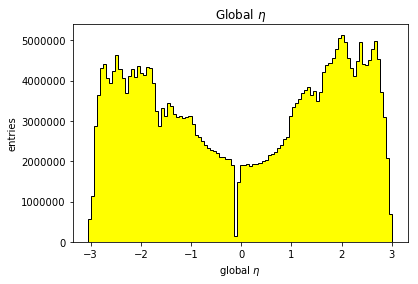

In [4]:
plt.hist(tree[b'global_eta'].array(), bins=100, facecolor='yellow', ec='black', histtype='stepfilled')
plt.xlabel('global $\eta$')
plt.ylabel('entries')
plt.title('Global $\eta$')

#plt.savefig(plot_dir + "track_eta.pdf", format="pdf")
plt.savefig(plot_dir + "global_eta.png", format="png", dpi=300)
plt.show()

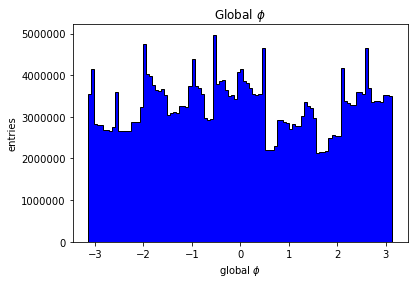

In [5]:
plt.hist(tree[b'global_phi'].array(), bins=100, facecolor='blue', ec='black', histtype='stepfilled')
plt.xlabel('global $\phi$')
plt.ylabel('entries')
plt.title('Global $\phi$')
#plt.savefig(plot_dir + "track_eta.pdf", format="pdf")
plt.savefig(plot_dir + "global_phi.png", format="png", dpi=300)
plt.show()

In [5]:
df_grid = tree.pandas.df([b'size', b'cols', b'rows',b'x', b'y', b'global_eta', b'global_phi', b'bx', b'instaLumi', b'bx', b'tres'], entrystop=1000)
#print(df_grid)
#print(df_grid['cols'].max())
#df_grid['pos_x']
print(df_grid['global_eta'][0])
#df_grid.columns = df_grid.columns.droplevel("subentry")
df_grid.columns
#df_grid.head()


subentry
0   -2.827124
1   -2.827124
2   -2.827124
3   -2.827124
4   -2.827124
Name: global_eta, dtype: float64


Index(['size', 'cols', 'rows', 'x', 'y', 'global_eta', 'global_phi', 'bx',
       'instaLumi', 'tres'],
      dtype='object')

In [41]:
df_grid = tree.pandas.df([b'size', b'cols', b'rows', b'global_eta', b'global_phi', b'instaLumi', b'bx', b'tres'])
df_grid.head()

,size,cols,rows,global_eta,global_phi,instaLumi,bx,tres
0,5,1,5,-2.827124,0.156948,16524.0,1572,126876
1,1,1,1,-2.819737,0.238554,16524.0,1572,126876
2,17,16,3,-2.798016,0.120511,16524.0,1572,126876
3,9,8,8,-2.769898,0.085925,16524.0,1572,126876
4,18,17,2,-2.756851,0.178974,16524.0,1572,126876


In [ ]:
df_grid['tres']

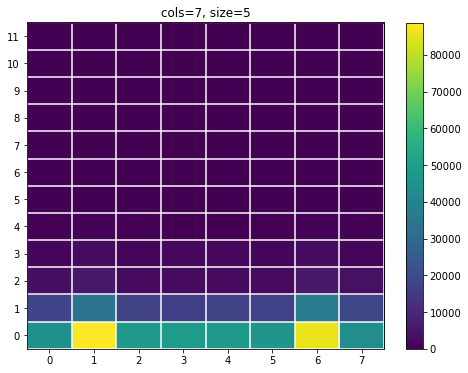

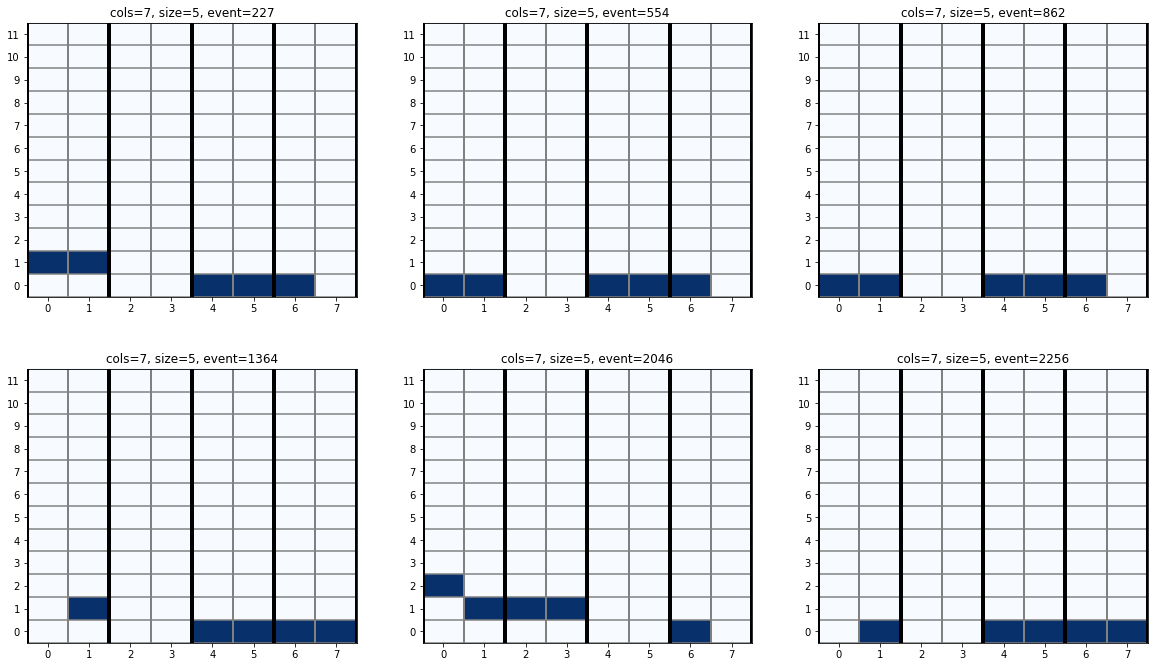

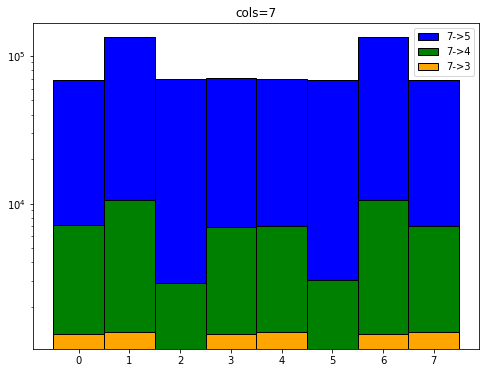

In [72]:
import numpy as np
df_grid7 = df_grid.query('cols == 7')
df_grid75 = df_grid7.query('size == 5')
df_grid74 = df_grid7.query('size == 4')
df_grid73 = df_grid7.query('size == 3')
plt.figure(figsize=[8.0,6.0])
bins75 = [np.linspace(-0.5,7.5, 9), np.linspace(-0.5,df_grid75['y'].max()+0.5, df_grid75['y'].max()+2)]
bins74 = [np.linspace(-0.5,7.5, 9), np.linspace(-0.5,df_grid74['y'].max()+0.5, df_grid74['y'].max()+2)]
bins73 = [np.linspace(-0.5,7.5, 9), np.linspace(-0.5,df_grid73['y'].max()+0.5, df_grid73['y'].max()+2)]

h = plt.hist2d(df_grid75['x'], df_grid75['y'], bins=bins75)
for y in h[2]:
    plt.axhline(y, h[1][0], h[1][-1], color="white")
for x in h[1]:
    plt.axvline(x, h[2][0], h[2][-1], color="white")
plt.title("cols=7, size=5")
plt.yticks(range(df_grid75['y'].max()+1))
plt.colorbar()
plt.savefig(plot_dir + "cols7_size5.png", format="png", dpi=300)
plt.show()

plt.figure(figsize=[8.0,6.0])
index_list = df_grid75.index.values
#print(index_list[0][0])
size = 5
for j in range(6):
    i = index_list[j*size][0]
    plt.subplot(2,3,j+1)
    h = plt.hist2d(df_grid75['x'][i], df_grid75['y'][i], bins=bins75, cmap="Blues", label="event "+str(i))
    plt.yticks(range(df_grid75['y'].max()+1))
    for y in h[2]:
        plt.axhline(y, h[1][0], h[1][-1], color="gray")
    for x in h[1]:
        linewidth_ = 2
        linecolor = "gray"
        if (int(x+0.5)%2) == 0:
            linecolor = "black"
            linewidth_ = 4
        plt.axvline(x, h[2][0], h[2][-1], color=linecolor, linewidth=linewidth_)
    plt.title("cols=7, size=5, event=" + str(i))
    #plt.colorbar()
plt.tight_layout()
plt.subplots_adjust(right=2.0, top=1.5, wspace=0.2)
plt.savefig(plot_dir + "cols7_size5_events.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=[8.0,6.0])
plt.hist(df_grid75['x'], bins=bins75[0], color="blue", ec="black", label="7->5", log=True)
plt.hist(df_grid74['x'], bins=bins74[0], color="green", ec="black", label="7->4", log=True)
plt.hist(df_grid73['x'], bins=bins73[0], color="orange", ec="black", label="7->3", log=True)
plt.title("cols=7")
plt.legend(loc="best")
plt.savefig(plot_dir + "cols7_hist.png", format="png", dpi=300)
plt.show()

#df_grid75.head()

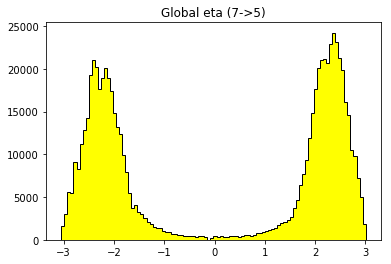

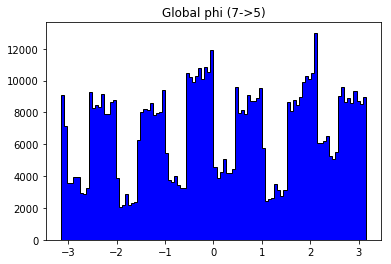

In [75]:
plt.hist(df_grid75['global_eta'], bins=100, color="yellow", ec="black", histtype="stepfilled")
plt.title("Global eta (7->5)")
plt.savefig(plot_dir + "cols7_size5_eta.png", format="png", dpi=300)
plt.show()
plt.hist(df_grid75['global_phi'], bins=100, color="blue", ec="black", histtype="stepfilled")
plt.title("Global phi (7->5)")
plt.savefig(plot_dir + "cols7_size5_phi.png", format="png", dpi=300)
plt.show()
#plt.hist(df_grid75['global_phi'], color="green", ec="black", histtype="stepfilled")
